# Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

from IPython.display import display
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold

# Đọc dữ liệu

In [2]:
# Đọc dữ liệu  bằng pandas
train = pd.read_csv('./Data/train_data.csv')
test = pd.read_csv('./Data/test_data.csv')
cat_train = train.select_dtypes(include=['object']).columns.tolist()
cat_test = test.select_dtypes(include=['object']).columns.tolist()

train.drop(columns=cat_train, inplace=True)
test.drop(columns=cat_test, inplace=True)

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
X_train = train.iloc[:, :-1]    # Dataframe 
y_train = train.iloc[:, -1]     # Series    (chứa 1 giá trị mục tiêu huấn luyện)

X_test = test.iloc[:, :-1]      # Dataframe 
y_test = test.iloc[:, -1]       # Series    (chứa 1 giá trị mục tiêu kiểm tra)

# Cài đặt hàm

In [3]:

def eda_correlation_significance(df, target):
    results = []
    for col in df.columns:
        if col != target:
            r, p = pearsonr(df[col], df[target])
            results.append({
                'Feature': col,
                'Correlation': r,
                'p-value': p
            })
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values(by='Correlation', key=abs, ascending=False)
    return results_df

def eda_scatter_features_vs_target(df, target):

    features = [col for col in df.columns if col != target]
    n = len(features)
    
    
    cols = 4
    rows = (n + cols - 1) // cols  
    
    fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
    axes = axes.flatten()  
    
    for i, col in enumerate(features):
        sns.scatterplot(x=df[col], y=df[target], ax=axes[i])
        axes[i].set_title(f"{col} vs {target}")
    
    
    for j in range(i+1, rows*cols):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()


*Chú thích: Cần có docstrings cho các hàm.*

# Visualization Data

Correlation Significance and p-value:
                Feature  Correlation        p-value
0      dien_tich_dat_m2     0.540703  4.627751e-243
1  dien_tich_su_dung_m2     0.502631  5.214865e-205
3               nha_tam     0.192123   4.775398e-28
2             phong_ngu     0.182041   2.652023e-25
Scatter plot:


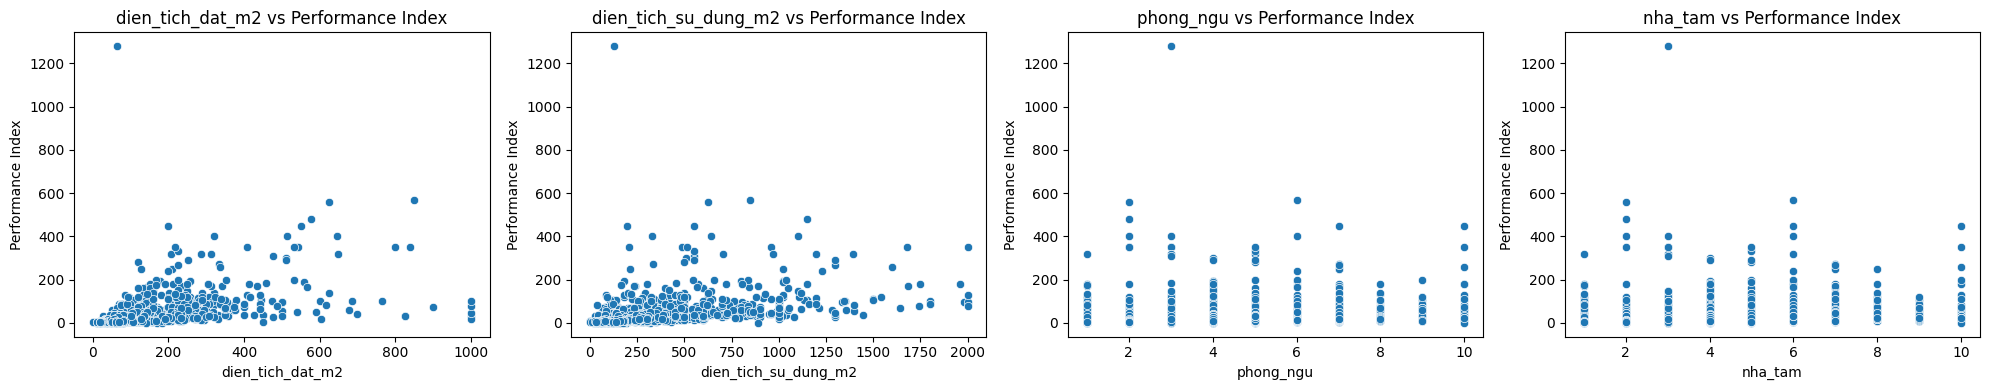

In [4]:
# Phân tích khám phá dữ liệu thông qua thống kê và các biểu đồ
# Chỉ được phân tích trên tập huấn luyện

y_train = y_train.rename('Performance Index')
df_train = pd.concat([X_train, y_train], axis=1)


print('Correlation Significance and p-value:')
cor_sig_df = eda_correlation_significance(df_train, target='Performance Index')
print(cor_sig_df)


print('Scatter plot:')
eda_scatter_features_vs_target(df_train, target='Performance Index')

